# Exploratory Data Analysis

Data and information retrieved from the UCI Machine Learning Repository. <br>
https://archive.ics.uci.edu/ml/datasets/Drug+consumption+%28quantified%29 <br>
https://www.healthline.com/health/big-five-personality-traits#takeaway

In [1]:
#Import necessary libraries
import pandas as pd
import os
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as ss
import seaborn as sns

In [2]:
#Verify data is in directory
print(os.getcwd())
print(os.listdir())

C:\Users\filia\Springboard DS\Capstone 2\Personality Type Drug Consumption Risk
['.ipynb_checkpoints', 'drug_consumption.csv', 'drug_consumption.data', 'Personality Profile Drug Consumption Risk - Data Wrangling .ipynb', 'Personality Profile Drug Consumption Risk - EDA.ipynb']


In [3]:
df = pd.read_csv('drug_consumption.csv', index_col=0)
df.head()

,ID,Age,Gender,Education,Country,Ethnicity,Neuroticism,Extraversion,Openness_to_Experience,Agreeableness,...,Ecstasy,Heroin,Ketamine,Legal Highs,LSD,Methadone,Mushrooms,Nicotine,Semer,VSA
0,1,35-44,Female,Professional certificate/diploma,UK,Mixed-White/Asian,39.0,36.0,42.0,37.0,...,Never used,Never used,Never used,Never used,Never used,Never used,Never used,Used in last decade,Never used,Never used
1,2,25-34,Male,Doctorate,UK,White,29.0,52.0,55.0,48.0,...,Used in last month,Never used,Used in last decade,Never used,Used in last decade,Used in last year,Never used,Used in last month,Never used,Never used
2,3,35-44,Male,Professional certificate/diploma,UK,White,31.0,45.0,40.0,32.0,...,Never used,Never used,Never used,Never used,Never used,Never used,Used over a decade ago,Never used,Never used,Never used
3,4,18-24,Female,Masters,UK,White,34.0,34.0,46.0,47.0,...,Never used,Never used,Used in last decade,Never used,Never used,Never used,Never used,Used in last decade,Never used,Never used
4,5,35-44,Female,Doctorate,UK,White,43.0,28.0,43.0,41.0,...,Used over a decade ago,Never used,Never used,Used over a decade ago,Never used,Never used,Used in last decade,Used in last decade,Never used,Never used


### Make Drug Columns Binomial
All drug columns are multilevel categorical values of usage. "Never used" and "Used over a decade ago" will be considered "Non-user" and all other classes will become "User" for binomial classification.

In [4]:
bi_use = ['Non-user', 'Non-user','User','User','User','User','User']
multi_use = ['Never used','Used over a decade ago','Used in last decade','Used in last year','Used in last month','Used in last week','Used in last day']

df.iloc[:,13:32] = df.iloc[:,13:32].replace(multi_use, bi_use)
df.head()

,ID,Age,Gender,Education,Country,Ethnicity,Neuroticism,Extraversion,Openness_to_Experience,Agreeableness,...,Ecstasy,Heroin,Ketamine,Legal Highs,LSD,Methadone,Mushrooms,Nicotine,Semer,VSA
0,1,35-44,Female,Professional certificate/diploma,UK,Mixed-White/Asian,39.0,36.0,42.0,37.0,...,Non-user,Non-user,Non-user,Non-user,Non-user,Non-user,Non-user,User,Non-user,Non-user
1,2,25-34,Male,Doctorate,UK,White,29.0,52.0,55.0,48.0,...,User,Non-user,User,Non-user,User,User,Non-user,User,Non-user,Non-user
2,3,35-44,Male,Professional certificate/diploma,UK,White,31.0,45.0,40.0,32.0,...,Non-user,Non-user,Non-user,Non-user,Non-user,Non-user,Non-user,Non-user,Non-user,Non-user
3,4,18-24,Female,Masters,UK,White,34.0,34.0,46.0,47.0,...,Non-user,Non-user,User,Non-user,Non-user,Non-user,Non-user,User,Non-user,Non-user
4,5,35-44,Female,Doctorate,UK,White,43.0,28.0,43.0,41.0,...,Non-user,Non-user,Non-user,Non-user,Non-user,Non-user,User,User,Non-user,Non-user


In [5]:
#for col in df.iloc[:,13:32].columns:
#    print(df[col].unique())

### Distribution of Drug Usage

In [6]:
drugs = df.iloc[:,13:32]
drugs_ls = drugs.columns
drugs_usage = pd.melt(drugs, value_vars=drugs_ls, var_name='Drugs', value_name='Usage')
drugs_usage.head()

,Drugs,Usage
0,Alcohol,User
1,Alcohol,User
2,Alcohol,User
3,Alcohol,User
4,Alcohol,User


In [7]:
drugs_grouped_usage = drugs_usage.groupby('Drugs')['Usage'].value_counts(normalize=True).sort_values(ascending=False)
drug = [i for i, j in drugs_grouped_usage.index if j=='User']
usg_percent = [round(drugs_grouped_usage[i][j]*100,2) for i, j in drugs_grouped_usage.index if j=='User']
print(drug)
print(usg_percent)

['Chocolate', 'Caffeine', 'Alcohol', 'Cannabis', 'Nicotine', 'Benzos', 'Legal Highs', 'Ecstasy', 'Mushrooms', 'Cocaine', 'Amphetamines', 'LSD', 'Methadone', 'Amyl', 'Ketamine', 'VSA', 'Heroin', 'Crack', 'Semer']
[98.14, 98.04, 96.39, 67.11, 67.06, 40.8, 40.42, 39.84, 36.82, 36.45, 36.02, 29.55, 22.12, 19.63, 18.57, 12.2, 11.25, 10.13, 0.32]


[Text(0.5, 0, 'Percentage')]

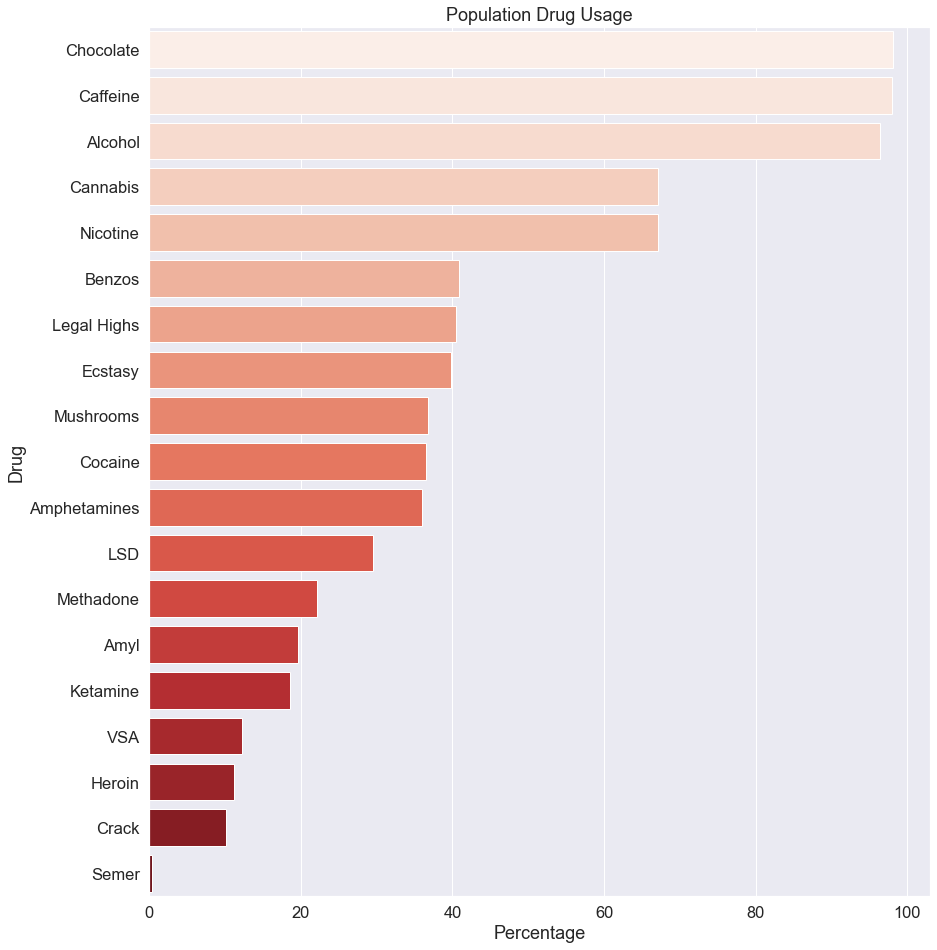

In [8]:
plt.figure(figsize=(14,16))
sns.set(font_scale=1.5)
plt.ylabel('Drug')
plt.title('Population Drug Usage')
sns.barplot(x=usg_percent, y=drug, palette='Reds').set(xlabel='Percentage')

### Distribution of Drug Consumption of Nicotine For Age, Gender, Ethnicity, Education and Country

In [9]:
nico_age = df.loc[:,['Age','Nicotine']]
nico_age_grouped = nico_age.groupby('Age')['Nicotine'].value_counts(normalize=True).sort_values(ascending=False)
age = [i for i, j in nico_age_grouped.index if j=='User']
usg_percent = [round(nico_age_grouped[i][j]*100,2) for i, j in nico_age_grouped.index if j=='User']

In [10]:
#nico_age_grouped

[Text(0, 0.5, 'Percentage')]

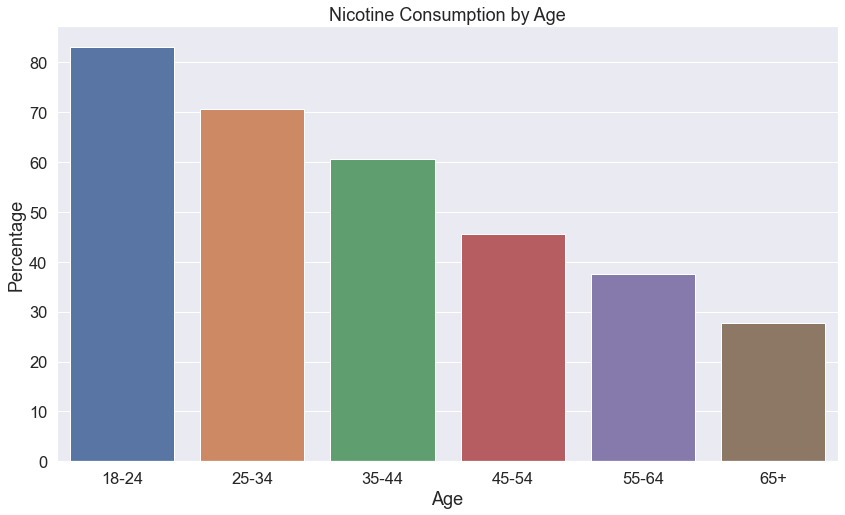

In [11]:
plt.figure(figsize=(14,8))
sns.set(font_scale=1.5)
plt.xlabel('Age')
plt.title('Nicotine Consumption by Age')
sns.barplot(x=age, y=usg_percent).set(ylabel='Percentage')

In [12]:
#ages = sorted(df.Age.unique())

#plt.figure(figsize=(14,8))
#sns.set(font_scale=1.5)
#plt.title('Distribution of Nicotine Users Among Different Age Groups')
#sns.countplot(x='Age', hue='Nicotine', order=ages, data=nico_age, palette='Set1').set(ylabel='Count')

In [13]:
nico_gen = df.loc[:,['Gender','Nicotine']]
nico_gen_grouped = nico_gen.groupby('Gender')['Nicotine'].value_counts(normalize=True).sort_values(ascending=False)
gen = [i for i, j in nico_gen_grouped.index if j=='User']
usg_percent = [round(nico_gen_grouped[i][j]*100,2) for i, j in nico_gen_grouped.index if j=='User']

[Text(0, 0.5, 'Percentage')]

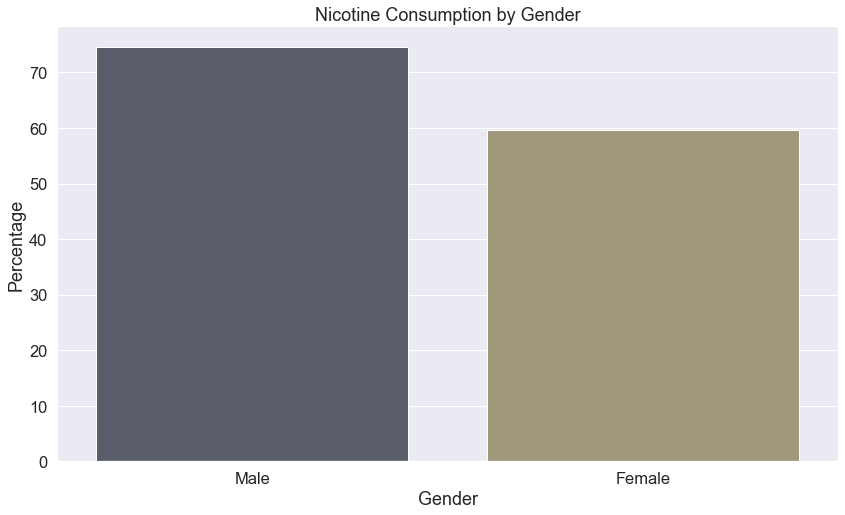

In [14]:
plt.figure(figsize=(14,8))
sns.set(font_scale=1.5)
plt.xlabel('Gender')
plt.title('Nicotine Consumption by Gender')
sns.barplot(x=gen, y=usg_percent, palette='cividis').set(ylabel='Percentage')

In [15]:
#nico_gen = df.loc[:,['Gender','Nicotine']]

#plt.figure(figsize=(14,8))
#sns.set(font_scale=1.5)
#plt.title('Distribution of Nicotine Users Among Males and Females')
#sns.countplot(x='Gender', hue='Nicotine', order=['Male','Female'], data=nico_gen, palette='cividis').set(ylabel='Count')

In [16]:
nico_edu = df.loc[:,['Education','Nicotine']]
nico_edu_grouped = nico_edu.groupby('Education')['Nicotine'].value_counts(normalize=True).sort_values(ascending=False)
edu = [i for i, j in nico_edu_grouped.index if j=='User']
usg_percent = [round(nico_edu_grouped[i][j]*100,2) for i, j in nico_edu_grouped.index if j=='User']

[Text(0.5, 0, 'Percentage')]

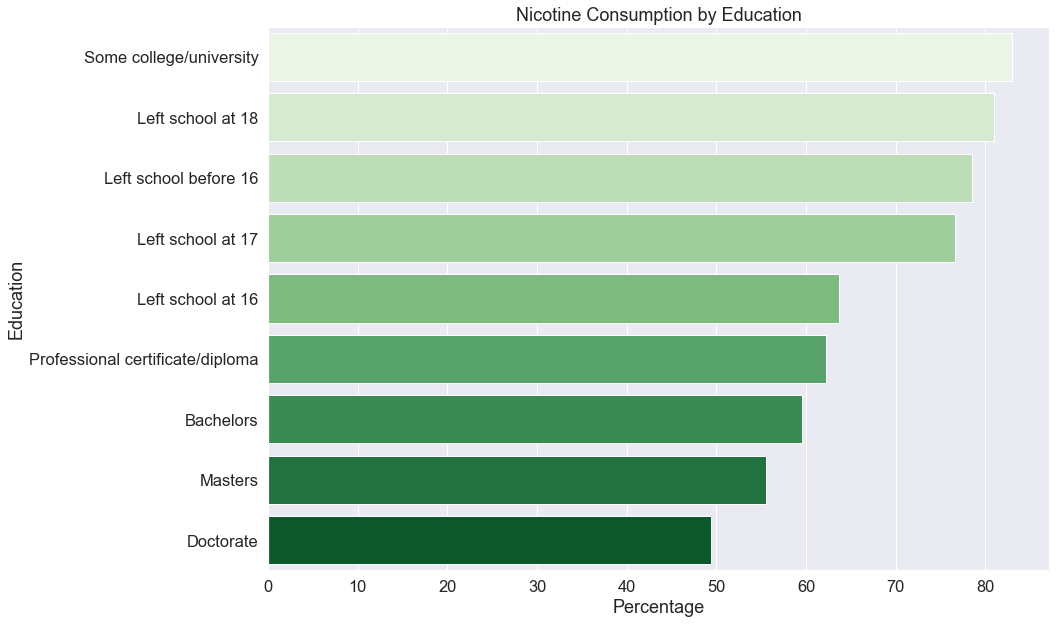

In [17]:
plt.figure(figsize=(14,10))
sns.set(font_scale=1.5)
plt.ylabel('Education')
plt.title('Nicotine Consumption by Education')
sns.barplot(x=usg_percent, y=edu, palette='Greens').set(xlabel='Percentage')

In [18]:
#nico_edu = df.loc[:,['Education','Nicotine']]
#edus = ['Some college/university', 'Bachelors', 'Professional certificate/diploma', 'Masters', 'Left school at 18', 'Left school at 16', 'Doctorate', 'Left school at 17', 'Left school before 16']

#plt.figure(figsize=(14,12))
#sns.set(font_scale=1.5)
#plt.title('Distribution of Nicotine Users Among Different Education Levels')
#sns.countplot(y='Education', hue='Nicotine', order=edus, data=nico_edu, palette='Greens').set(xlabel='Count')

In [19]:
nico_cntry = df.loc[:,['Country','Nicotine']]
nico_cntry_grouped = nico_cntry.groupby('Country')['Nicotine'].value_counts(normalize=True).sort_values(ascending=False)
cntry = [i for i, j in nico_cntry_grouped.index if j=='User']
usg_percent = [round(nico_cntry_grouped[i][j]*100,2) for i, j in nico_cntry_grouped.index if j=='User']

[Text(0.5, 0, 'Percentage')]

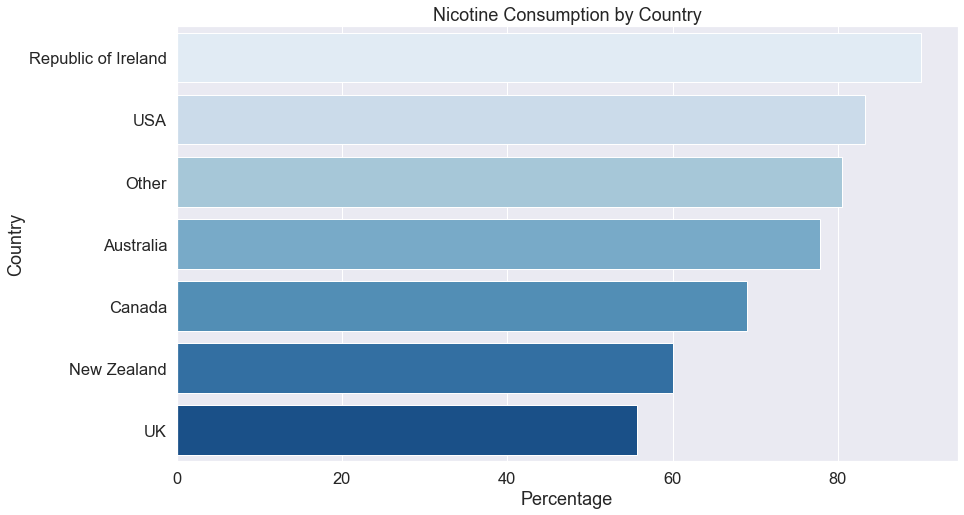

In [20]:
plt.figure(figsize=(14,8))
sns.set(font_scale=1.5)
plt.ylabel('Country')
plt.title('Nicotine Consumption by Country')
sns.barplot(x=usg_percent, y=cntry, palette='Blues').set(xlabel='Percentage')

In [21]:
#nico_cntry = df.loc[:,['Country','Nicotine']]
#countries = ['UK', 'USA', 'Other', 'Australia', 'Republic of Ireland', 'New Zealand']

#plt.figure(figsize=(14,10))
#sns.set(font_scale=1.5)
#plt.title('Distribution of Nicotine Users in Countries')
#sns.countplot(y='Country', hue='Nicotine', order=countries, data=nico_cntry, palette='Blues').set(xlabel='Count')

In [22]:
nico_eth = df.loc[:,['Ethnicity','Nicotine']]
nico_eth_grouped = nico_eth.groupby('Ethnicity')['Nicotine'].value_counts(normalize=True).sort_values(ascending=False)
eth = [i for i, j in nico_eth_grouped.index if j=='User']
usg_percent = [round(nico_eth_grouped[i][j]*100,2) for i, j in nico_eth_grouped.index if j=='User']

[Text(0, 0.5, 'Percentage')]

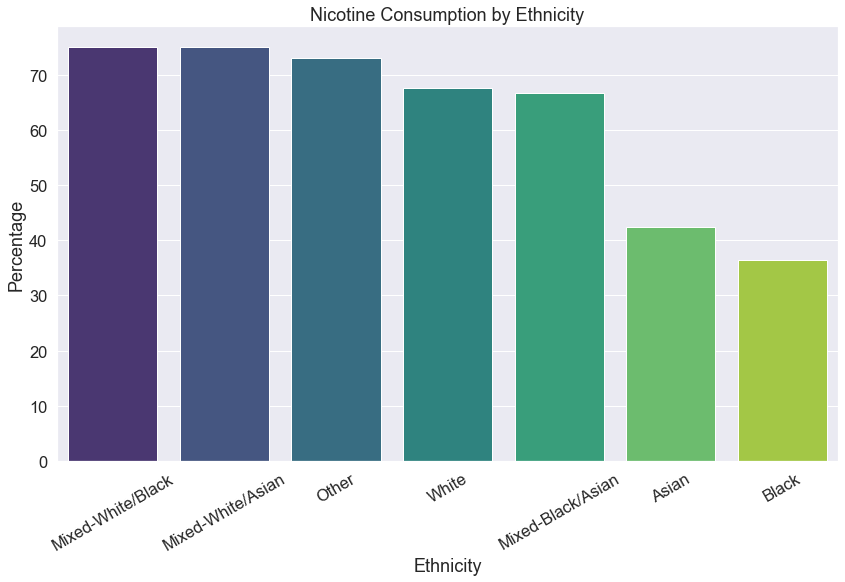

In [23]:
plt.figure(figsize=(14,8))
sns.set(font_scale=1.5)
plt.xticks(rotation=30)
plt.xlabel('Ethnicity')
plt.title('Nicotine Consumption by Ethnicity')
sns.barplot(x=eth, y=usg_percent, palette='viridis').set(ylabel='Percentage')

In [24]:
df.Ethnicity.value_counts()

White                1720
Other                  63
Black                  33
Asian                  26
Mixed-White/Black      20
Mixed-White/Asian      20
Mixed-Black/Asian       3
Name: Ethnicity, dtype: int64

In [25]:
#eth_cntry = df.loc[:,['Ethnicity','Nicotine']]

#plt.figure(figsize=(14,10))
#sns.set(font_scale=1.5)
#plt.title('Distribution of Nicotine Users by Ethnicity')
#sns.countplot(x='Ethnicity', hue='Nicotine', data=eth_cntry, palette='RdYlGn').set(ylabel='Count')

In [26]:
#test = df[df['Country'] == 'UK'].loc[:,['Country','Nicotine']]
#test.Nicotine.value_counts()

### Variability of Big 5 Personality Score Between Nicotine Users and Non-Users

In [27]:
#Melt and seperate features of interest
nico_big5 = df.loc[:,['Neuroticism','Extraversion','Openness_to_Experience','Agreeableness','Conscientiousness','Nicotine']]

nico_big5_melted = pd.melt(nico_big5, id_vars=['Nicotine'], value_vars=['Neuroticism','Extraversion','Openness_to_Experience','Agreeableness','Conscientiousness'], var_name='Big 5 Personality Traits', value_name='Score')
nico_big5_melted.head()

,Nicotine,Big 5 Personality Traits,Score
0,User,Neuroticism,39.0
1,User,Neuroticism,29.0
2,Non-user,Neuroticism,31.0
3,User,Neuroticism,34.0
4,User,Neuroticism,43.0


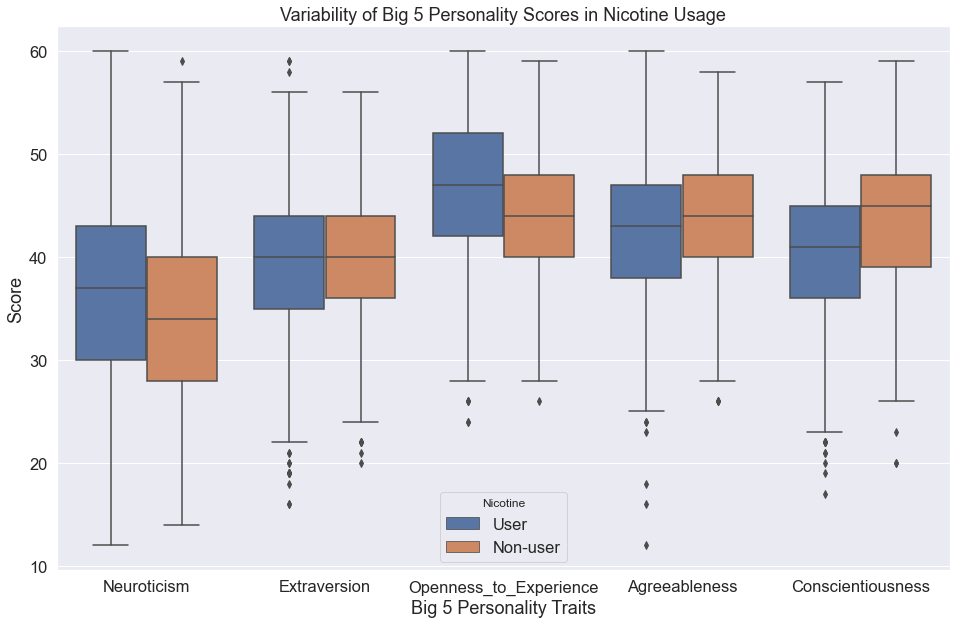

In [28]:
plt.figure(figsize=(16,10))
sns.set(font_scale=1.5)
plt.title('Variability of Big 5 Personality Scores in Nicotine Usage')
sns.boxplot(x="Big 5 Personality Traits", y="Score", hue='Nicotine', data=nico_big5_melted)

### Variability of Impulsiveness and Sensation-Seeking Between Nicotine Users and Non-Users

In [29]:
nico_impSS = df.loc[:,['Impulsiveness','Sensation-Seeking','Nicotine']]

nico_impSS_melted = pd.melt(nico_impSS, id_vars=['Nicotine'], value_vars=['Impulsiveness','Sensation-Seeking'], var_name='Impulsiveness/SS', value_name='Score')
nico_impSS_melted.head()

,Nicotine,Impulsiveness/SS,Score
0,User,Impulsiveness,-0.21712
1,User,Impulsiveness,-0.71126
2,Non-user,Impulsiveness,-1.37983
3,User,Impulsiveness,-1.37983
4,User,Impulsiveness,-0.21712


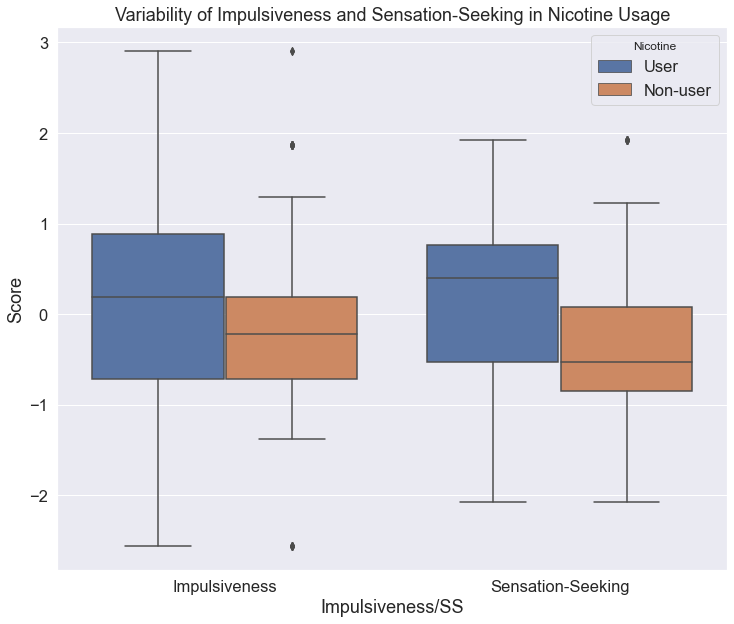

In [30]:
plt.figure(figsize=(12,10))
sns.set(font_scale=1.5)
plt.title('Variability of Impulsiveness and Sensation-Seeking in Nicotine Usage')
sns.boxplot(x="Impulsiveness/SS", y="Score", hue='Nicotine', data=nico_impSS_melted)

### Significance Testing

In [31]:
from scipy.stats import chi2_contingency

for x in df.columns:
    table = pd.crosstab(df[x], df['Nicotine'])
    chi2, p, dof, expected = chi2_contingency(table.values)
    
    if p < 0.05:
        print(x, 'is significantly correlated to Nicotine usage.')
        print('Chi-square value: %0.3f // p-value: %0.5f' %(chi2,p))
        print('\n')

Age is significantly correlated to Nicotine usage.
Chi-square value: 194.278 // p-value: 0.00000


Gender is significantly correlated to Nicotine usage.
Chi-square value: 47.290 // p-value: 0.00000


Education is significantly correlated to Nicotine usage.
Chi-square value: 115.187 // p-value: 0.00000


Country is significantly correlated to Nicotine usage.
Chi-square value: 144.498 // p-value: 0.00000


Ethnicity is significantly correlated to Nicotine usage.
Chi-square value: 23.681 // p-value: 0.00060


Neuroticism is significantly correlated to Nicotine usage.
Chi-square value: 76.150 // p-value: 0.00596


Openness_to_Experience is significantly correlated to Nicotine usage.
Chi-square value: 125.947 // p-value: 0.00000


Agreeableness is significantly correlated to Nicotine usage.
Chi-square value: 67.056 // p-value: 0.00467


Conscientiousness is significantly correlated to Nicotine usage.
Chi-square value: 124.694 // p-value: 0.00000


Impulsiveness is significantly correlated t

### Correlation of Features

In [32]:
#Drop id column
data = df.drop(columns='ID')
print(data.iloc[:,5:12].columns)
#data.iloc[:,5:12] = data.iloc[:,5:12].astype(str)
print(len(data.columns))

Index(['Neuroticism', 'Extraversion', 'Openness_to_Experience',
       'Agreeableness', 'Conscientiousness', 'Impulsiveness',
       'Sensation-Seeking'],
      dtype='object')
31


In [33]:
#data.info()

In [34]:
#Seperate binomial from multilevel categorical values
multi_cat = [i for i in data.iloc[:,0:12].columns]
print(multi_cat)
bino_cat = [i for i in data.iloc[:,12:31].columns]
print(bino_cat)

['Age', 'Gender', 'Education', 'Country', 'Ethnicity', 'Neuroticism', 'Extraversion', 'Openness_to_Experience', 'Agreeableness', 'Conscientiousness', 'Impulsiveness', 'Sensation-Seeking']
['Alcohol', 'Amphetamines', 'Amyl', 'Benzos', 'Caffeine', 'Cannabis', 'Chocolate', 'Cocaine', 'Crack', 'Ecstasy', 'Heroin', 'Ketamine', 'Legal Highs', 'LSD', 'Methadone', 'Mushrooms', 'Nicotine', 'Semer', 'VSA']


In [35]:
#this function is used to get correlation between categorical features
# extracted from https://towardsdatascience.com/the-search-for-categorical-correlation-a1cf7f1888c9
def cramers_v(x, y):
    confusion_matrix = pd.crosstab(x,y)
    chi2 = ss.chi2_contingency(confusion_matrix)[0]
    n = confusion_matrix.sum().sum()
    phi2 = chi2/n
    r,k = confusion_matrix.shape
    phi2corr = max(0, phi2-((k-1)*(r-1))/(n-1))
    rcorr = r-((r-1)**2)/(n-1)
    kcorr = k-((k-1)**2)/(n-1)
    return np.sqrt(phi2corr/min((kcorr-1),(rcorr-1)))

In [36]:
columns = data.columns
corr = pd.DataFrame(index=columns, columns=columns)

for i in range(0, len(columns)):
    for j in range(i, len(columns)):
        
            if i == j:
                corr_factor = 1.0
            else:
                corr_factor =  cramers_v(data[columns[j]], data[columns[i]])
                
            corr.loc[columns[j],columns[i]] = corr_factor
    
#corr.fillna(value=np.nan,inplace=True)
#plt.figure(figsize=(20,10))
#sns.set(font_scale=1.8) 
#sns.heatmap(corr,annot=True,fmt='.2f',annot_kws={"size": 16})
#plt.show()

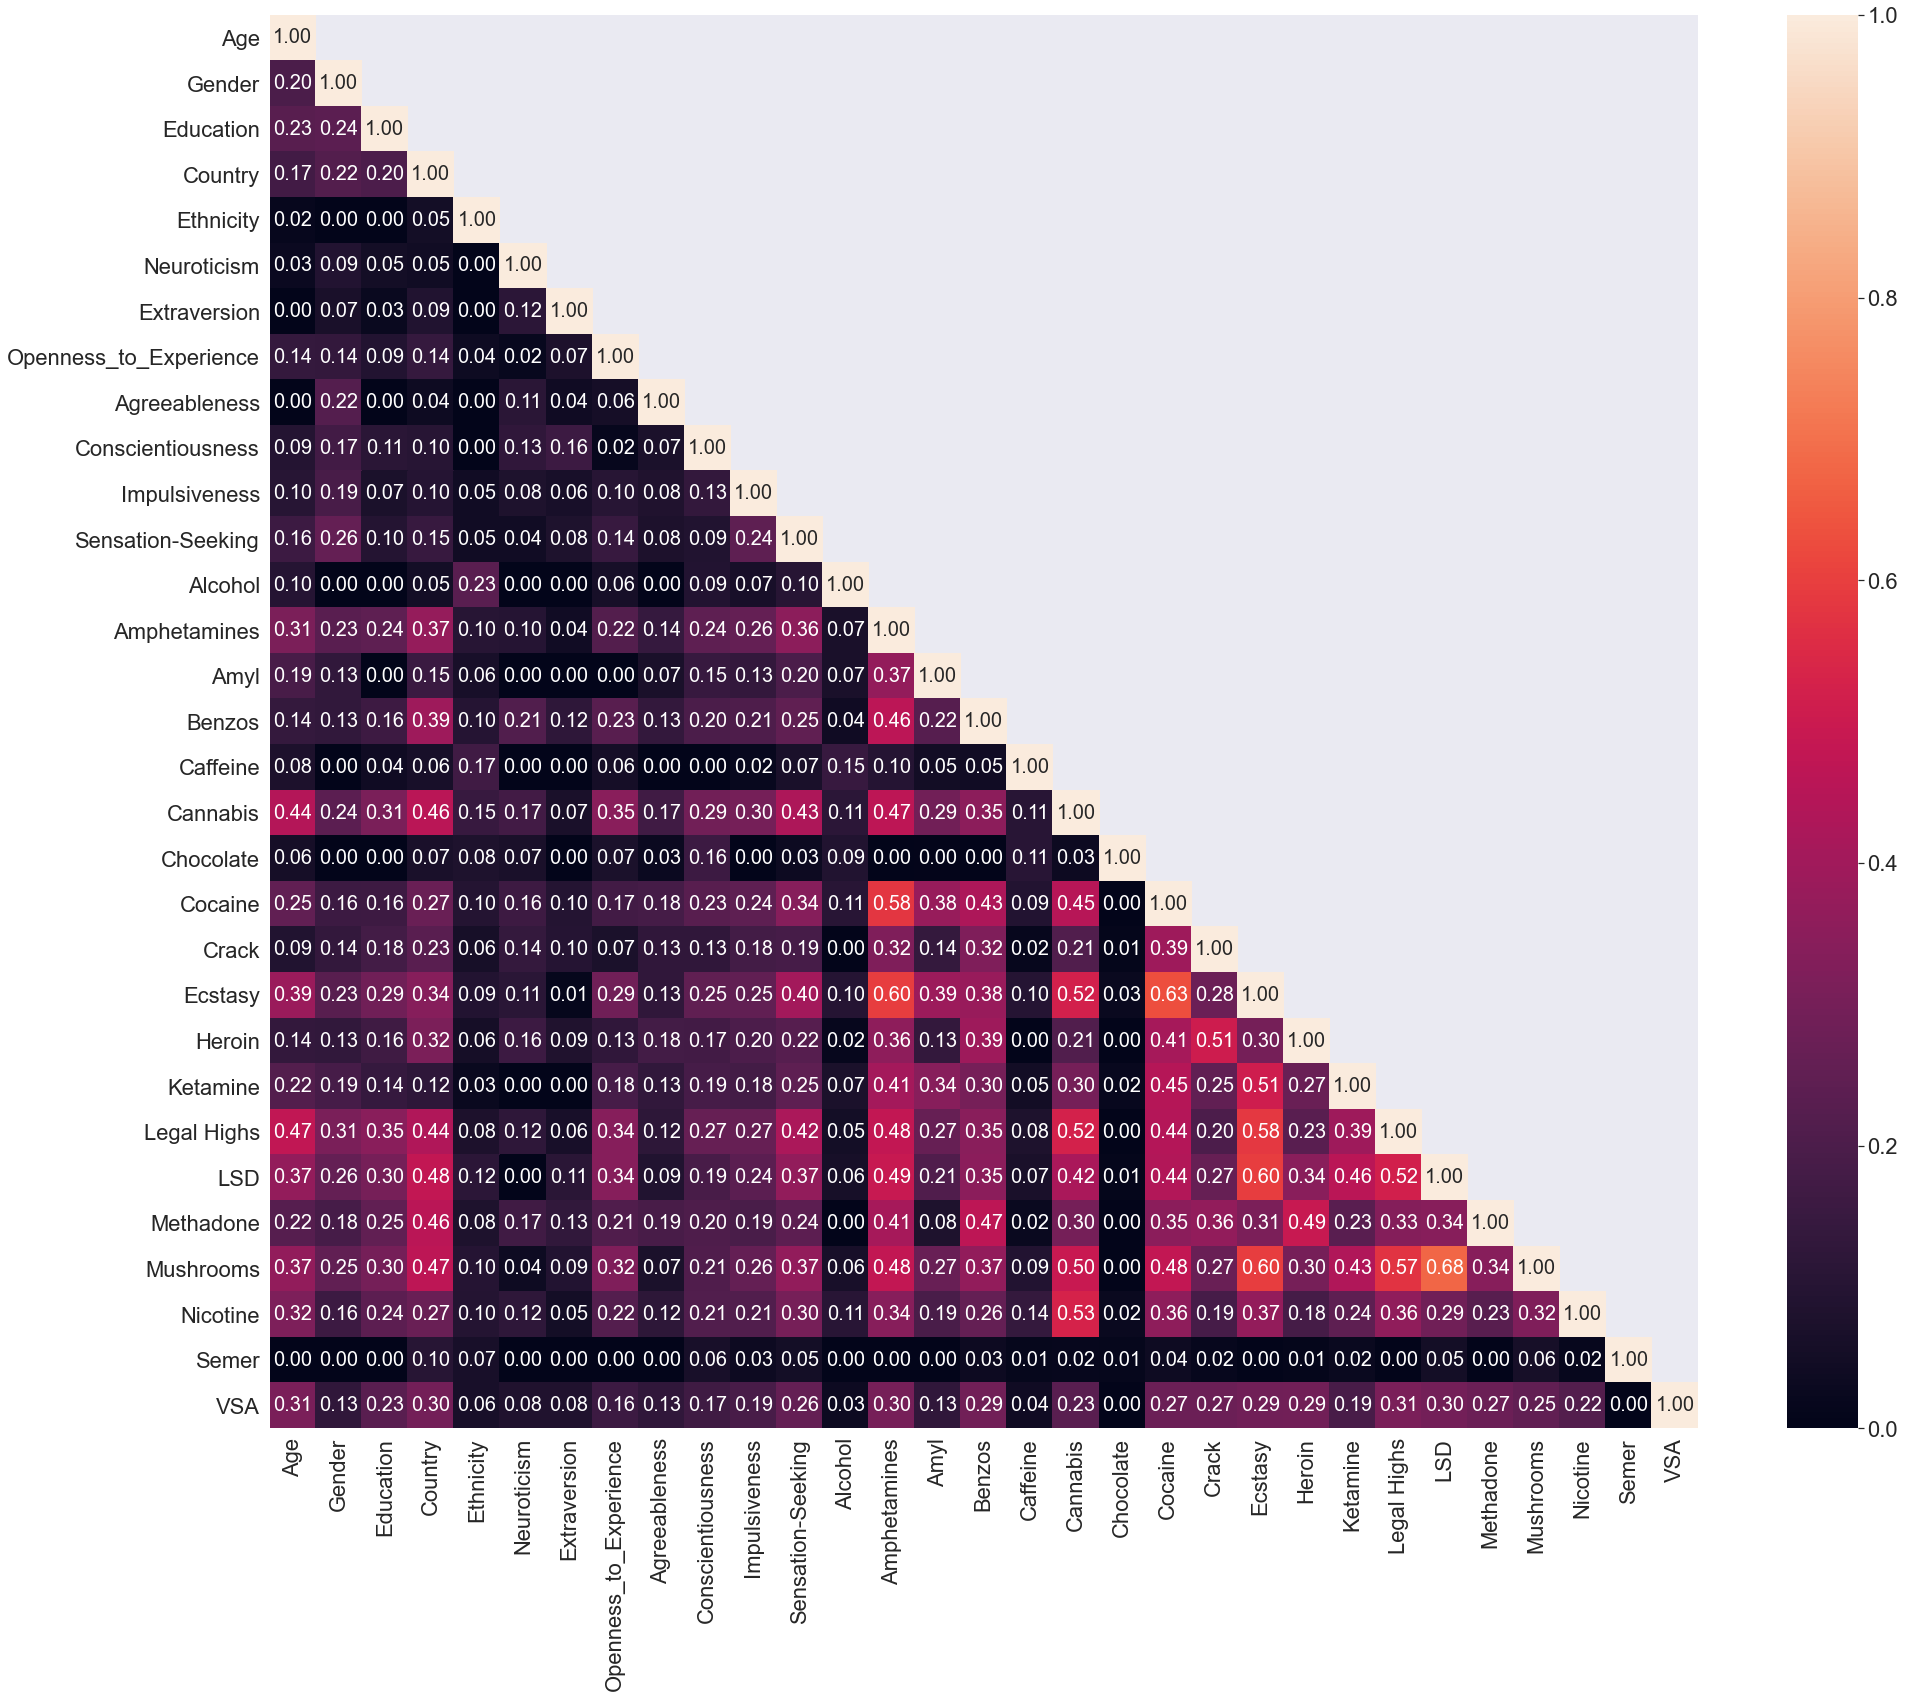

In [37]:
corr.fillna(value=np.nan,inplace=True)
plt.figure(figsize=(32,26))
sns.set(font_scale=2) 
sns.heatmap(corr,annot=True,fmt='.2f',annot_kws={"size": 20})
plt.show()

## Same Analysis for Chocolate

### Distribution of Chocolate Consumption For Age, Gender, Education and Country

In [38]:
#choco_age = df.loc[:,['Age','Chocolate']]

#plt.figure(figsize=(14,8))
#sns.set(font_scale=1.5)
#plt.title('Distribution of Chocolate Usage Among Different Age Groups')
#sns.countplot(x='Age', hue='Chocolate', order=ages, data=choco_age, palette='Set1').set(ylabel='Count')

In [39]:
#choco_gen = df.loc[:,['Gender','Chocolate']]

#plt.figure(figsize=(14,8))
#sns.set(font_scale=1.5)
#plt.title('Distribution of Chocolate Users Among Males and Females')
#sns.countplot(x='Gender', hue='Chocolate', order=['Male','Female'], data=choco_gen, palette='cividis').set(ylabel='Count')

In [40]:
#choco_edu = df.loc[:,['Education','Chocolate']]
#edus = ['Some college/university', 'Bachelors', 'Professional certificate/diploma', 'Masters', 'Left school at 18', 'Left school at 16', 'Doctorate', 'Left school at 17', 'Left school before 16']

#plt.figure(figsize=(14,12))
#sns.set(font_scale=1.5)
#plt.title('Distribution of Chocolate Users Among Different Education Levels')
#sns.countplot(y='Education', hue='Chocolate', order=edus, data=choco_edu, palette='Greens').set(xlabel='Count')

In [41]:
#choco_cntry = df.loc[:,['Country','Chocolate']]
#countries = ['UK', 'USA', 'Other', 'Australia', 'Republic of Ireland', 'New Zealand']

#plt.figure(figsize=(14,10))
#sns.set(font_scale=1.5)
#plt.title('Distribution of Chocolate Users in Countries')
#sns.countplot(y='Country', hue='Chocolate', order=countries, data=choco_cntry, palette='Blues').set(xlabel='Count')

In [42]:
#test = df[df['Country'] == 'UK'].loc[:,['Country','Nicotine']]
#test.Nicotine.value_counts()

### Variability of Big 5 Personality Score Between Chocolate Users and Non-Users

In [43]:
#Melt and seperate features of interest
choco_big5 = df.loc[:,['Neuroticism','Extraversion','Openness_to_Experience','Agreeableness','Conscientiousness','Chocolate']]

choco_big5_melted = pd.melt(choco_big5, id_vars=['Chocolate'], value_vars=['Neuroticism','Extraversion','Openness_to_Experience','Agreeableness','Conscientiousness'], var_name='Big 5 Personality Traits', value_name='Score')
choco_big5_melted.head()

,Chocolate,Big 5 Personality Traits,Score
0,User,Neuroticism,39.0
1,User,Neuroticism,29.0
2,User,Neuroticism,31.0
3,User,Neuroticism,34.0
4,User,Neuroticism,43.0


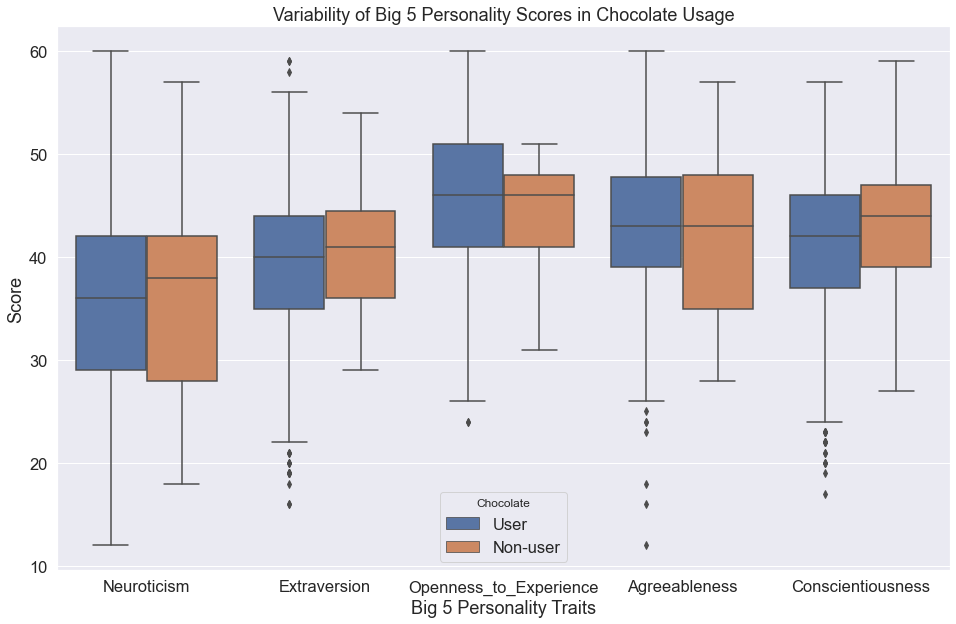

In [44]:
plt.figure(figsize=(16,10))
sns.set(font_scale=1.5)
plt.title('Variability of Big 5 Personality Scores in Chocolate Usage')
sns.boxplot(x="Big 5 Personality Traits", y="Score", hue='Chocolate', data=choco_big5_melted)

### Variability of Impulsiveness and Sensation-Seeking Between Nicotine Users and Non-Users

In [45]:
choco_impSS = df.loc[:,['Impulsiveness','Sensation-Seeking','Chocolate']]

choco_impSS_melted = pd.melt(choco_impSS, id_vars=['Chocolate'], value_vars=['Impulsiveness','Sensation-Seeking'], var_name='Impulsiveness/SS', value_name='Score')
choco_impSS_melted.head()

,Chocolate,Impulsiveness/SS,Score
0,User,Impulsiveness,-0.21712
1,User,Impulsiveness,-0.71126
2,User,Impulsiveness,-1.37983
3,User,Impulsiveness,-1.37983
4,User,Impulsiveness,-0.21712


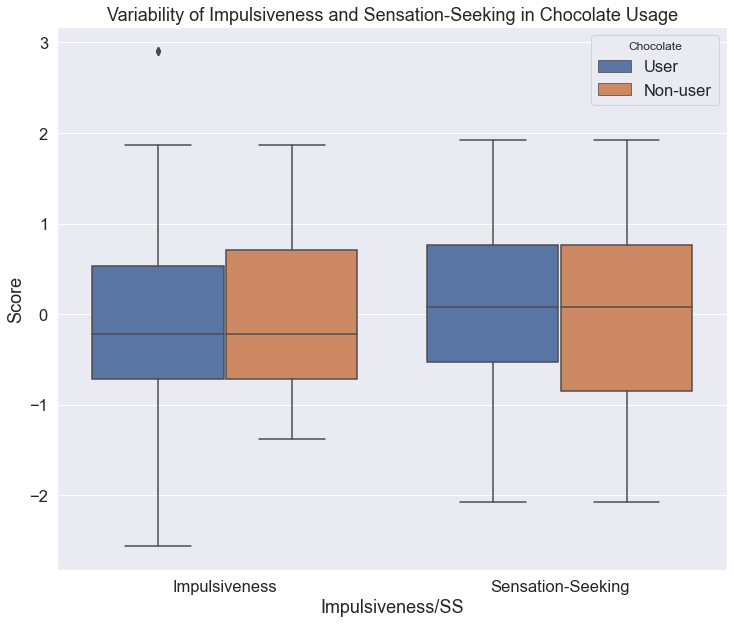

In [46]:
plt.figure(figsize=(12,10))
sns.set(font_scale=1.5)
plt.title('Variability of Impulsiveness and Sensation-Seeking in Chocolate Usage')
sns.boxplot(x="Impulsiveness/SS", y="Score", hue='Chocolate', data=choco_impSS_melted)

### Significance Testing

In [48]:
for x in df.columns:
    table = pd.crosstab(df[x], df['Chocolate'])
    chi2, p, dof, expected = chi2_contingency(table.values)
    
    if p < 0.05:
        print(x, 'is significantly correlated to Chocolate usage.')
        print('   Chi-square value: %0.3f // p-value: %0.5f' %(chi2,p))
        print('\n')
    #else:
        #print(x, 'is independent of Chocholate usage.')
        
    #print('\n')

Country is significantly correlated to Chocolate usage.
   Chi-square value: 14.676 // p-value: 0.02293


Ethnicity is significantly correlated to Chocolate usage.
   Chi-square value: 18.274 // p-value: 0.00558


Conscientiousness is significantly correlated to Chocolate usage.
   Chi-square value: 87.889 // p-value: 0.00002


Alcohol is significantly correlated to Chocolate usage.
   Chi-square value: 15.032 // p-value: 0.00011


Caffeine is significantly correlated to Chocolate usage.
   Chi-square value: 21.995 // p-value: 0.00000


Chocolate is significantly correlated to Chocolate usage.
   Chi-square value: 1830.523 // p-value: 0.00000


